# Tkinter

Is library for building interfaces with python.

## Instalation

Surprisingly, installing the tkinter isn't easy.

It can't be installed with pip alone. On Ubuntu you will need to use the package manager for this:
```bash
apt install python-tk
```

After that, tkinter will be available in the global python environment. But for installation in local pythhon envronment you have to go to the `activate` script of the environment and add there following lines.

```bash
TK_LIBRARY=/usr/lib/python3.10/lib-tk:/usr/lib/python3.10/site-packages/PIL:/usr/lib
TKPATH=/usr/lib/python3.10/lib-tk:/usr/lib/python3.10/site-packages/PIL:/usr/lib 
TCL_LIBRARY=/usr/lib 
export TCL_LIBRARY TK_LIBRARY TKPATH
```

**Note** that you have ot use your python version instead of `python3.10`.

## Examples displaying

Obviously, pages associated with tkinter will contain a ton of screenshots, so it would be great to have an opportunity to build them automatically.

The following code snippet demonstrates how to save a module that captures screenshots of a specified tkinter window.

In [1]:
%%writefile tkinter_files/screenshot.py
import tkinter as tk
import pyscreenshot as ImageGrab

def take_screenshot(root:tk.Tk):
    '''
    Taking screeshot of the given
    tkinter application. And displays
    it using jupyter funciton `display`.

    Parameters
    ----------
    root:tk.Tk
        tkinter application instalce;
    '''
    root.update()
    
    x = root.winfo_rootx()
    y = root.winfo_rooty()
    w = x + root.winfo_width()
    h = y + root.winfo_height()
    
    screenshot = ImageGrab.grab(bbox=(x, y, w, h))
    
    root.destroy()
    display(screenshot)

Overwriting tkinter_files/screenshot.py


Here is an example of how this module can be utilized, allowing you to display the results of your tkinter programs without leaving the Jupyter Notebook environment.

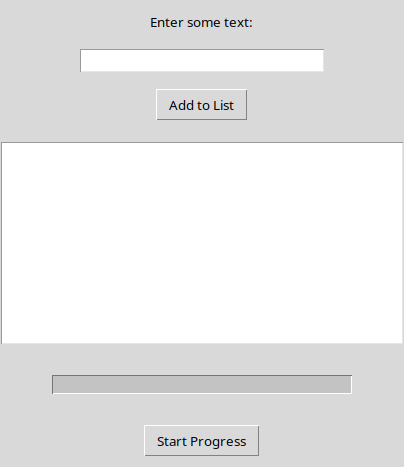

In [2]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from tkinter_files.screenshot import take_screenshot

class SimpleApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Simple Tkinter Interface")

        # Label
        self.label = tk.Label(
            root, 
            text="Enter some text:"
        )
        self.label.pack(pady=10)

        # Entry
        self.entry = tk.Entry(root, width=30)
        self.entry.pack(pady=5)

        # Button
        self.button = tk.Button(
            root, text="Add to List", 
            command=self.add_to_list
        )
        self.button.pack(pady=10)

        # Listbox
        self.listbox = tk.Listbox(root, width=50, height=10)
        self.listbox.pack(pady=10)

        # Progress Bar
        self.progress = ttk.Progressbar(
            root, orient="horizontal", 
            length=300, mode="determinate"
        )
        self.progress.pack(pady=20)

        # Start Progress Bar Button
        self.progress_button = tk.Button(
            root, text="Start Progress", 
            command=self.start_progress
        )
        self.progress_button.pack(pady=10)

    def add_to_list(self):
        text = self.entry.get()
        if text:
            self.listbox.insert(tk.END, text)
            self.entry.delete(0, tk.END)
        else:
            messagebox.showwarning("Warning", "Please enter some text.")

    def start_progress(self):
        self.progress["value"] = 0
        self.progress["maximum"] = 100
        self.update_progress()

    def update_progress(self):
        if self.progress["value"] < 100:
            self.progress["value"] += 10
            self.root.after(500, self.update_progress)
        else:
            messagebox.showinfo("Info", "Progress complete!")

# Create the main application window
root = tk.Tk()
app = SimpleApp(root)
root.after(200, take_screenshot, root)
root.mainloop()

## Component overview

Here are the main components that can be added to a tkinter application.

In [1]:
import tkinter as tk
from tkinter import ttk
from tkinter_files.screenshot import take_screenshot

### Button

Simple button. It is important to note that you can set the text written on the button by setting the `text` property.

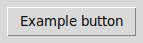

In [7]:
root = tk.Tk()
button = tk.Button(
    root, text="Example button"
)

button.pack(padx=6, pady=6)

root.after(200, take_screenshot, root)
root.mainloop()

### Radiobutton

It's an interface that can be activated or deactivated. It is usually associated with a set of other radio buttons, and only one can be activated at a time. This option is perfect when you need to build an interface that allows selecting only one option from a set of options.

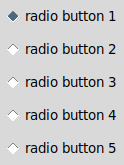

In [7]:
root = tk.Tk()

my_var = tk.IntVar()

for i in range(5):
    radiobutton = ttk.Radiobutton(
        root, 
        text=f"radio button {i+1}",
        variable=my_var,
        value=i
    )
    radiobutton.pack(padx=6, pady=6)

root.after(200, take_screenshot, root)
root.mainloop()

### Scrollbar

It's common to use it in combination with some other elements. The following example shows how `tk.Scrollbar` can be used together with `ListBox`. See the [scrolling page](tkinter/scrolling.ipynb) for more details.

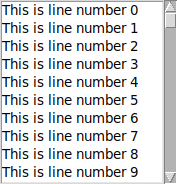

In [8]:
root = tk.Tk()
scrollbar = tk.Scrollbar(root)
scrollbar.pack(side = tk.RIGHT, fill=tk.Y)

mylist = tk.Listbox(root, yscrollcommand = scrollbar.set)
for line in range(100):
   mylist.insert(tk.END, "This is line number " + str(line))
   
mylist.pack(side = tk.LEFT, fill = tk.BOTH )
scrollbar.config(command = mylist.yview)

root.after(200, take_screenshot, root)
root.mainloop()

### Entry

You can add text to an entry using the `insert` method.

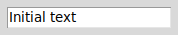

In [8]:
root = tk.Tk()
entry = tk.Entry(root, text="Initial text")
entry.pack(padx=6, pady=6)

entry.insert(0, "Initial text")

root.after(200, take_screenshot, root)
root.mainloop()

### Treeview

`ttk.Treview` is a class that is used to display data in a hierarchical or tabular form. Watch more details in [spefic page for tree view](tkinter/treeview.ipynb).

The following example demonstrates how to create a table with nested elements for certain records.

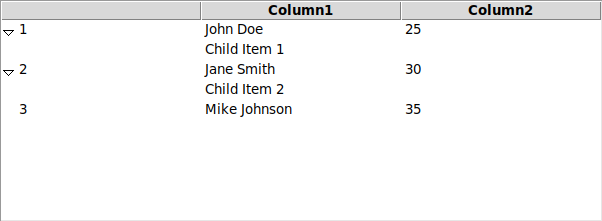

In [51]:
root = tk.Tk()

# Creating treeview
tree = ttk.Treeview(
    root, 
    columns=("Column1", "Column2"),
)
tree.heading("Column1", text="Column1")
tree.heading("Column2", text="Column2")
tree.pack()

# Insert data
tree.insert(parent="", index="end", text="1", iid=0, values=("John Doe", "25"), open=True)
tree.insert(parent="", index="end", text="2", iid=1, values=("Jane Smith", "30"), open=True)
tree.insert(parent="", index="end", text="3", values=("Mike Johnson", "35"), open=True)

# Insert child
tree.insert(parent="0", index="end", values=("Child Item 1", ""))
tree.insert(parent="1", index="end", values=("Child Item 2", ""))

root.after(200, take_screenshot, root)
root.mainloop()

### Pained window

A PanedWindow is a container widget that may contain any number of panes, arranged horizontally or vertically.

So in following example you can move border between red and blue area.

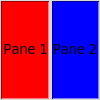

In [6]:
root = tk.Tk()
root.geometry('100x100')

# Create a PanedWindow widget
paned_window = tk.PanedWindow(root, orient=tk.HORIZONTAL)
paned_window.pack(fill=tk.BOTH, expand=True)

# Create two resizable panes
pane1 = tk.Label(paned_window, text="Pane 1", bg="red", relief=tk.SUNKEN)
pane2 = tk.Label(paned_window, text="Pane 2", bg="blue", relief=tk.SUNKEN)

# Add the panes to the PanedWindow
paned_window.add(pane1)
paned_window.add(pane2)

root.after(200, take_screenshot, root)
root.mainloop()

## Binds

Here we consider a mechanism that allows actions on user interfaces to bind functions. 

We need to define a function that takes an argument and pass this function to the bind method of the object whose action the function will call. The function is called with `tkinter.Event` passed as a parameter. Through that object, you can access details of the event that triggered the function.

The following example uses button and prints the type of parameter passed, as it was clicked on the button it also prints the coordinates of the cursor.

In [10]:
import tkinter as tk

root = tk.Tk()

def button_click(event):
    print(type(event))
    print(f"x={event.x}, y={event.y}")

button = tk.Button(root, text="Click Me")
button.bind("<Button-1>", button_click)
button.pack(padx=6, pady=6)

root.mainloop()

<class 'tkinter.Event'>
x=50, y=22
<class 'tkinter.Event'>
x=11, y=16
<class 'tkinter.Event'>
x=43, y=16


### Common binds

This is a list of popular bindings with descriptions.

| Event          | Description                                                                 |
|----------------|-----------------------------------------------------------------------------|
| `<Button-1>`   | Left mouse button pressed.                                                  |
| `<Button-2>`   | Middle mouse button pressed.                                                |
| `<Button-3>`   | Right mouse button pressed.                                                 |
| `<Double-Button-1>` | Double-click with the left mouse button.                                |
| `<B1-Motion>`  | Mouse is moved with the left button held down.                              |
| `<Enter>`      | Mouse enters the widget area.                                               |
| `<Leave>`      | Mouse leaves the widget area.                                               |
| `<FocusIn>`    | Widget gains keyboard focus.                                                |
| `<FocusOut>`   | Widget loses keyboard focus.                                                |
| `<Key>`        | Any key is pressed.                                                         |
| `<KeyPress>`   | A key is pressed (same as `<Key>`).                                         |
| `<KeyRelease>` | A key is released.                                                          |
| `<Configure>`  | The widget is resized or moved.                                             |
| `<Destroy>`    | The widget is destroyed.                                                    |
| `<Motion>`     | Mouse is moved.                                                             |
| `<MouseWheel>` | Mouse wheel is moved (usually scroll event).                                |
| `<Return>`     | The Enter key is pressed.                                                   |
| `<Escape>`     | The Escape key is pressed.                                                  |
| `<Control-Char>` | Control key combination (e.g., `<Control-c>` for Ctrl+C).                  |
| `<Alt-Char>`   | Alt key combination (e.g., `<Alt-x>` for Alt+X).                            |
| `<Shift-Char>` | Shift key combination (e.g., `<Shift-X>` for Shift+X).                      |
| `<Fi>`         | Function key Fi pressed. Where i is a number from 1 to 12.  

### Multiple binds

If you bind more than one function to the same event - only the last bound function will be executed.

The following example shows this - there are two functions linked to the click of the button. The first function prints "111", the second "222".

In [16]:
import tkinter as tk

root = tk.Tk()

def button_click_first(event):
    print("Function one")


button = tk.Button(root, text="Click Me")
button.bind("<Button-1>", lambda event: print("111"))
button.bind("<Button-1>", lambda event: print("222"))
button.pack(padx=6, pady=6)

root.mainloop()

222
222
222
222


After a few clicks on the buttons, all we got were "222" messages.